<a href="https://colab.research.google.com/github/mtrentz/blog_notebooks/blob/master/1_Motivacao_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivação para aprender Python: Ciência de Dados
 - Utilizando a biblioteca Pandas para alterar e analisar datasets

## Carregando o dataset

In [1]:
# Importando a biblioteca que vamos utilizar
import pandas as pd

Nesse exemplo será utilizado uma base de dados do governo sobre a extração de produtos florestais.

O download do banco é feito [daqui](http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif/resource/b0a31254-ad8a-423b-bf2e-5ad9ab621844)

A descrição de cada coluna (metadados) está [neste link](http://homolog-dados.mma.gov.br/pt_BR/dataset/ffd9ab35-5719-4ec1-8d13-ae8f738bebc2/resource/8171a927-2604-4fe0-8330-468605353d01/download/extracao-de-produtos-florestais-madeireiros-dicionario-de-dados.pdf)



In [2]:
# URL direto para os dados em formato de csv
dataset_url = "http://homolog-dados.mma.gov.br/pt_BR/dataset/ffd9ab35-5719-4ec1-8d13-ae8f738bebc2/resource/b0a31254-ad8a-423b-bf2e-5ad9ab621844/download/extracao_pfm_1994-2016.csv"
# Criando o nosso dataframe, que é essencialmente a nossa tabela
df = pd.read_csv(dataset_url, encoding='latin1', sep=';')

In [3]:
# Mostrando todas as colunas e as primeiras linhas de nosso dataset
df.head()

,Tipo de produto florestal,Tipo de Floresta,Tipo de Uso,Tipo de produto extrativo (com código),Tipo de produto extrativo,Unidade de Medida PEVS,Unidade de Medida transformada,Ano_PEVS,Quantidade PEVS,Quantidade transformada,Valor (mil reais)
0,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1994,98857.0,98857.0,46312.0
1,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1995,108922.0,108922.0,35075.0
2,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1996,111438.0,111438.0,51801.0
3,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1997,100214.0,100214.0,35690.0
4,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1998,119074.0,119074.0,48685.0


In [4]:
# É sempre interessante saber quão grande é o nosso banco de dados. Aqui vemos que ele tem 1472 linhas e 11 colunas.
df.shape

(1472, 11)

## Explorando algumas colunas

In [6]:
# Segundo os metadados, na segunda coluna consta se os dados foram obtidos de florestas naturais ou plantadas, podemos explorar a distribuição dessa classificação!
df['Tipo de Floresta'].value_counts()

Floresta Natural     1012
Floresta Plantada     460
Name: Tipo de Floresta, dtype: int64

In [7]:
# Fazendo o mesmo procedimento para a terceira coluna, na qual consta a finalidade do produto
df['Tipo de Uso'].value_counts()

Alimentícios                                  230
Oleaginosos                                   184
Madeira para Indústria - Subdivisão II        138
Madeira para Combustível - Subdivisão         138
Aromáticos, medicinais, tóxicos e corantes     92
Madeira para Combustível                       92
Fibras                                         92
Outros produtos da silvicultura                69
Tanantes                                       69
Ceras                                          69
Gomas não elásticas                            69
Borrachas                                      69
Madeira para Indústria - subdivisão            69
Madeira para Indústria                         46
Árvores abatidas                               23
Nó de pinho                                    23
Name: Tipo de Uso, dtype: int64

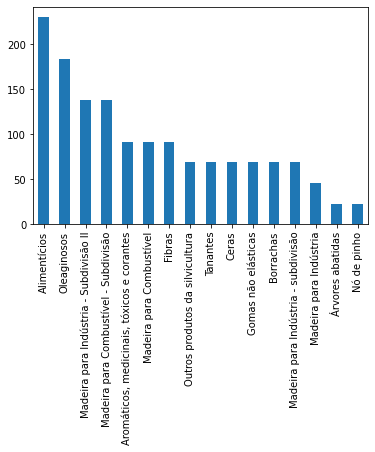

In [8]:
# Podemos mostrar isso de forma gráfica
df['Tipo de Uso'].value_counts().plot(kind='bar')

Quando trabalhamos com colunas numéricas algo bom e rápido de se fazer é pedir a descrição das colunas

Porém CUIDADO: Muitos datasets apresentam colunas numericas como 'ID' ou coisas do gênero no qual valores como média e desvio não fazem sentido para a analise.

No nosso caso conseguimos extrair algumas boas informações desse unico comando

In [9]:
df.describe()

,Ano_PEVS,Quantidade PEVS,Quantidade transformada,Valor (mil reais)
count,1472.000000,1.469000e+03,1.469000e+03,1.467000e+03
mean,2005.000000,5.394295e+06,6.056780e+06,2.762581e+05
std,6.635504,1.758627e+07,1.797219e+07,9.631044e+05
min,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1999.000000,2.000000e+00,2.000000e+00,0.000000e+00
50%,2005.000000,1.146000e+03,1.146000e+03,9.540000e+02
75%,2011.000000,7.161900e+04,7.816700e+04,2.843050e+04
max,2016.000000,1.336508e+08,1.336508e+08,1.025586e+07


- Vemos que a coluna ano vai de 1994 a 2016.
- A quantidade (em tonelada, como mostrada na coluna 'Unidade de Medida PEVS') apresenta um valor médio de 5.3 milhões.
- A quantidade transformada é praticamente igual a coluna de 'quantidade', o que indica que na maioria dos casos o valor entre as duas colunas é igual.
- Tanto a coluna quantidade como o valor em mil reais apresntam linhas em branco (visto que seus minimos são 0).

## Respondendo perguntas pela analise desse banco de dados:

### Pergunta 1: Qual produto apresenta o maior custo por kilograma?

In [10]:
# Conferindo se todas as linhas apresentam medidas em toneladas
df['Unidade de Medida PEVS'].value_counts()

Toneladas         1058
Metros cúbicos     391
Mil árvores         23
Name: Unidade de Medida PEVS, dtype: int64

Vemos que muitas medidas são feitas em metros cúbicos ou em mil arvores. Como este é um caso exemplo, vou simplesmente filtrar essas linhas. Em um estudo real talvez fosse necessário descobrir a densidade de cada produto e achar um jeito de transformar arvores para toneladas.

In [11]:
# Aqui eu filtro o dataframe só deixando as linhas no qual a unidade é Toneladas
df = df.loc[df['Unidade de Medida PEVS'] == 'Toneladas', :]

Agora podemos começar a criar nossa coluna de interesse que é custo/kg.

Essa nova coluna vai ser simplesmente uma divisão da coluna 'Valor (mil reais)' x 1000 por 'Quantidade PEVS' x 1000.

Como estamos interessados no peso por kilograma, criamos uma nova coluna para peso em kg multiplicando o peso em toneladas por mil.

A seguir vamos criar já a coluna de interesse a aplicar o resto das operações necessárias (que é multiplicar o valor em mil reais por 1000)

In [12]:
# Criando nova coluna
df['Peso (kg)'] = df['Quantidade PEVS']*1000
# Criando coluna de interesse enquanto fazemos a ultima operação necessária
df['Custo por kilograma'] = (df['Valor (mil reais)']*1000)/df['Peso (kg)']
# Visualizando novamente o nosso dataframe
df.head()

,Tipo de produto florestal,Tipo de Floresta,Tipo de Uso,Tipo de produto extrativo (com código),Tipo de produto extrativo,Unidade de Medida PEVS,Unidade de Medida transformada,Ano_PEVS,Quantidade PEVS,Quantidade transformada,Valor (mil reais),Peso (kg),Custo por kilograma
0,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1994,98857.0,98857.0,46312.0,98857000.0,0.468475
1,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1995,108922.0,108922.0,35075.0,108922000.0,0.322019
2,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1996,111438.0,111438.0,51801.0,111438000.0,0.464841
3,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1997,100214.0,100214.0,35690.0,100214000.0,0.356138
4,PFNM,Floresta Natural,Alimentícios,1.1 - Açaí (fruto) (Toneladas),Açaí (fruto),Toneladas,Toneladas,1998,119074.0,119074.0,48685.0,119074000.0,0.408863


Olhando o nosso dataframe vemos duas novas colunas: Peso(kg) que criamos como uma etapa parcial e a nossa coluna de interesse e 'Custo por kilograma' no qual temos o calculo desejado.

Agora podemos responder a nossa pergunta, vamos order o nosso dataframe pela nossa coluna de interesse e ver o produto que apresenta o maior valor.


In [13]:
df.sort_values(by='Custo por kilograma', ascending=False).head()

,Tipo de produto florestal,Tipo de Floresta,Tipo de Uso,Tipo de produto extrativo (com código),Tipo de produto extrativo,Unidade de Medida PEVS,Unidade de Medida transformada,Ano_PEVS,Quantidade PEVS,Quantidade transformada,Valor (mil reais),Peso (kg),Custo por kilograma
1451,PFNM,Floresta Natural,Tanantes,10.3 - Outros (Toneladas),Outros tanantes,Toneladas,Toneladas,2016,0.0,0.0,14.0,0.0,inf
219,PFNM,Floresta Natural,"Aromáticos, medicinais, tóxicos e corantes",2.1 - Ipecacuanha ou poaia (raiz) (Toneladas),Ipecacuanha ou poaia (raiz),Toneladas,Toneladas,2003,0.0,0.0,1.0,0.0,inf
229,PFNM,Floresta Natural,"Aromáticos, medicinais, tóxicos e corantes",2.1 - Ipecacuanha ou poaia (raiz) (Toneladas),Ipecacuanha ou poaia (raiz),Toneladas,Toneladas,2013,3.0,3.0,343.0,3000.0,114.333333
1354,PFNM,Floresta Natural,"Aromáticos, medicinais, tóxicos e corantes",2.1 - Ipecacuanha ou poaia (raiz) (Toneladas),Ipecacuanha ou poaia (raiz),Toneladas,Toneladas,2015,1.0,1.0,90.0,1000.0,90.000000
230,PFNM,Floresta Natural,"Aromáticos, medicinais, tóxicos e corantes",2.1 - Ipecacuanha ou poaia (raiz) (Toneladas),Ipecacuanha ou poaia (raiz),Toneladas,Toneladas,2014,1.0,1.0,84.0,1000.0,84.000000


Solução e algumas coisas a se notar:
- Como comentamos antes, existem valores nulos e isso pode atrapalhar em alguns calculos. Em analises "reais" o ideal é visualizar os valores nulos e os valores que estão faltando antes da analise e lidar com eles propriamente (deletar, inferir, etc...)
- Os 3 valores não nulos que vemos dizem que 'Ipecacuanha ou poaia (raiz)' tem o maior custo por peso.
- Podem existir erros nesse calculo, quem dirá que essas três linhas que vemos não são um caso a parte? Poderiam muito bem ser pontos fora da curva. Um jeito mais robusto de responder essa pergunta é pegar o custo/kg médio por tipo de produto extrativo! E é isso que faremos a seguir!

### Pergunta 1b: Quais são os três produtos que apresentam em média o maior custo por kilograma?

In [14]:
# Se você não está familiarizado com Pandas e Python no geral, aconselho aqui a não se preocupar muito com as formulas e apenas com o resultado.
import numpy as np
# Aqui nós vamos simplesmente excluir qualquer linha que apresente valor inifito para custo/kg
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

O que será feito aqui é algo parecido com as tabelas dinâmicas do excel. Vamos agrupar as linhas pelo tipo de produto extrativo depois iremos calcular o valor médio do custo/kg pra cada grupo e finalmente iremos ordenar de forma decrescente

In [15]:
gb = df.groupby('Tipo de produto extrativo')
gb['Custo por kilograma'].mean().sort_values(ascending=False).to_frame()

,Custo por kilograma
Tipo de produto extrativo,
Ipecacuanha ou poaia (raiz),37.552083
Balata,17.000000
Copaíba (óleo),7.405895
Cumaru (amêndoa),6.488684
Carnaúba (cera),5.693663
Carnaúba (pó),3.593458
Outros tanantes,3.539827
Maçaranduba,2.527321
Hevea (látex líquido),2.396778


Resultado:
1. Ipecacuanha ou poaia (raiz)
2. Balata
3. Copaíba (óleo)

### Pergunta 2: Desses produtos obtidos como resposta no exercicio 1b, como posso visualizar a sua categoria (Tipo de uso)?

In [26]:
# Defino aquela minha tabela anterior em uma váriavel chamada df2, pada poder usar ela futuramente
df2 = gb['Custo por kilograma'].mean().sort_values(ascending=False).to_frame()
df2.head()

,Custo por kilograma
Tipo de produto extrativo,
Ipecacuanha ou poaia (raiz),37.552083
Balata,17.000000
Copaíba (óleo),7.405895
Cumaru (amêndoa),6.488684
Carnaúba (cera),5.693663


O que vamos fazer agora é um 'join' em duas tabelas. Vamos juntar essa nossa nova tabela junto com a tabela original, sendo que desejo juntá-las pelo campo de 'tipo de produto extrativo.

In [27]:
# Mesma tabela anterior, somente passo a coluna indice (tipo de produto extrativo) para uma coluna normal
df2 = df2.reset_index()
df2.head()

,Tipo de produto extrativo,Custo por kilograma
0,Ipecacuanha ou poaia (raiz),37.552083
1,Balata,17.000000
2,Copaíba (óleo),7.405895
3,Cumaru (amêndoa),6.488684
4,Carnaúba (cera),5.693663


In [43]:
# Crio uma nova tabela somente com as colunas de interesse da minha tabela original
df3 = df.loc[:, ['Tipo de Uso', 'Tipo de produto extrativo']]
# Remove linhas repetidas
df3.drop_duplicates(inplace=True)
df3.head()

,Tipo de Uso,Tipo de produto extrativo
0,Alimentícios,Açaí (fruto)
21,Alimentícios,Castanha de cajú
42,Alimentícios,Castanha-do-Pará
63,Alimentícios,Erva-mate
84,Alimentícios,Mangaba


In [44]:
# Junto as minhas duas df pela coluna 'Tipo de produto extrativo'
df_final = df2.merge(df3, how='left', on='Tipo de produto extrativo')
df_final.head()

,Tipo de produto extrativo,Custo por kilograma,Tipo de Uso
0,Ipecacuanha ou poaia (raiz),37.552083,"Aromáticos, medicinais, tóxicos e corantes"
1,Balata,17.000000,Gomas não elásticas
2,Copaíba (óleo),7.405895,Oleaginosos
3,Cumaru (amêndoa),6.488684,Oleaginosos
4,Carnaúba (cera),5.693663,Ceras
